In [1]:
#*****Task 3 & Book_Maker: 1xBet****

import numpy as np
import pandas as pd
import csv
import os
from matplotlib import pyplot as plt

In [2]:
booking=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\booking.csv')
matches=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\matches.csv')

In [3]:
Early_Time=booking[booking.time<='30']  #firstly before 30min is filtered

In [4]:
Early_Time_Red=Early_Time[Early_Time.card=='red card'] #additionally red cards filtered

In [5]:
bets=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\bets.csv')

In [6]:
First_Book_Maker=bets[bets.odd_bookmakers=='1xBet']  #first book maker is 1xBet

In [7]:
Premier_League=matches[matches.league_id==148]
Home_Win_List=First_Book_Maker[First_Book_Maker.variable=='odd_1']
Away_Win_List=First_Book_Maker[First_Book_Maker.variable=='odd_2']
Draft_List=First_Book_Maker[First_Book_Maker.variable=='odd_x']


In [8]:
data= pd.merge(Home_Win_List,Away_Win_List,on='match_id',how='inner')
data_1=pd.merge(data,Premier_League,on='match_id',how='inner')

In [9]:
data_2=pd.merge(data_1,Draft_List,on='match_id',how='inner')

In [10]:
intersection=pd.merge(data_2,Early_Time_Red,on='match_id',how='inner')   #for the drop function intersection between row data and early red is needed
                                                                            

In [11]:
a=intersection.match_id #common match_id selected to remove

In [12]:
data_2=data_2.set_index('match_id')

In [13]:
data_2=data_2.drop(a,axis=0)  #matches in which occurs fault with red card before  30 min reduced

In [14]:
data_2['Prob_Home']=1/(data_2['value_x'])
data_2['Prob_Away']=1/(data_2['value_y'])
data_2['Prob_Draft']=1/(data_2['value'])



Text(0.5,1,'1xBet')

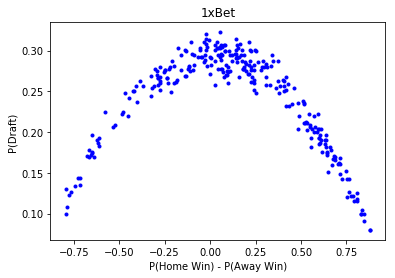

In [15]:
x=data_2['Prob_Home']-data_2['Prob_Away']
y=data_2['Prob_Draft']
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('1xBet')

In [16]:
data_2['dif']=data_2['Prob_Home']-data_2['Prob_Away']
data_2.reset_index(inplace=True)   #reseting index is needed for merging

In [17]:
data_3=pd.merge(data_2,matches,on='match_id',how='inner') #merging the match score and probabilities with respect to match_id

In [18]:
draft_matches = data_3[data_3.match_hometeam_score_y == data_3.match_awayteam_score_y] #filtering only draft matches
a = np.histogram(draft_matches['dif'], bins=np.arange(-1, 1.1, 0.1))[0]  #defining bins with 0,1 and calculating the draft matches in these bins

In [19]:
b = np.histogram(data_3['dif'], bins=np.arange(-1, 1.1, 0.1))[0] #calculating all matches in these bins
for index in range(len(b)):
    if b[index]==0:                        #preventing 0/0, dont affect the result 
        b[index]=1
    

In [20]:
actual_prob_draft=np.true_divide(a, b)  #real draft match rates

Text(0.5,1,'1xBet')

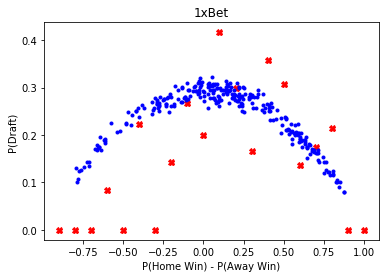

In [21]:
plt.plot(np.arange(-0.9,1.1,0.1),actual_prob_draft,'X',color='red')
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('1xBet')

In [22]:
#Comment: ****There is no significant change comparing to Task 2 output.*****